In [10]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# from copulas.multivariate import GaussianMultivariate

def alpha(f1,f2):
    y = 0.55*(f1-f2)-2.94
    return y


def alpha_IR(f1,f2):
    y = 1.64*(f1-f2)-2.82
    return y


def mJy_to_mag(F, F0):
    m = -2.5*np.log10(F*0.001/F0)
    return m


def e_mJy_to_mag(e_F, F):
    m = (2.5/np.log(10))*(e_F/F)
    return m


def mag_to_mJy(m, F0):
    F = F0*(10**(-m/2.5))/0.001
    return F


def e_mag_to_mJy(e_m, m, F0):
    m = (F0*np.log(10)/(0.001*2.5))*10**(-m/2.5)*(e_m)
    return m


def mag_to_Jy(m, F0):
    F = F0*(10**(-m/2.5))
    return F


def e_mag_to_Jy(e_m, m, F0):
    m = (F0*np.log(10)/(2.5))*10**(-m/2.5)*(e_m)
    return m

# NGC 3324

In [5]:
# def converttbldatatocsvformat(filename, header):
#     csv = open("".join([path, filename, ".csv"]), "w+")
#     csv.write(header + "\n")
#     tbl = open("".join([path, filename, ".tbl"]), "r")
#     lines = tbl.readlines()
#     for line in lines:
#         length = len(line)
#         line = line[:length - 2] + line[length-1:]
#         line = line.replace(",","N")
#         line = line.replace(",",",")
#         csv.write(line)
#     tbl.close()
#     csv.close()

# file = "VelaCarC_l286"
# path = "../../ngc3324/"
# # head = "#designation,tmass_designation,tmass_cntr,    l     ,   b     , dl , db ,  ra    ,    dec   ,  dra , ddec ,csf, mag_J,  dJ_m, mag_H,  dH_m,mag_Ks, dKs_m,mag3_6, d3_6m,mag4_5, d4_5m,mag5_8, d5_8m,mag8_0, d8_0m,   f_J    ,   df_J   ,   f_H    ,   df_H   ,   f_Ks   ,  df_Ks   ,   f3_6   ,  df3_6   ,   f4_5   ,   df4_5  ,   f5_8   ,  df5_8   ,   f8_0   ,  df8_0   , rms_f3_6 , rms_f4_5 , rms_f5_8 , rms_f8_0 ,  sky_3_6 ,  sky_4_5 ,  sky_5_8 ,  sky_8_0 ,  sn_J,  sn_H, sn_Ks,sn_3_6,sn_4_5,sn_5_8,sn_8_0,dens_3_6,dens_4_5,dens_5_8,dens_8_0, m3_6, m4_5, m5_8, m8_0, n3_6, n4_5, n5_8, n8_0,   sqf_J  ,   sqf_H  ,  sqf_Ks  ,  sqf_3_6 ,  sqf_4_5 ,  sqf_5_8 ,  sqf_8_0 ,mf3_6,mf4_5,mf5_8,mf8_0"
# head = "designation    tmass_designation    tmass_cntr        l            b          dl      db       ra            dec         dra      ddec     csf     mag_J      dJ_m     mag_H      dH_m    mag_Ks     dKs_m    mag3_6     d3_6m    mag4_5     d4_5m    mag5_8     d5_8m    mag8_0     d8_0m       f_J           df_J          f_H           df_H          f_Ks         df_Ks          f3_6         df3_6          f4_5          df4_5         f5_8         df5_8          f8_0         df8_0        rms_f3_6      rms_f4_5      rms_f5_8      rms_f8_0       sky_3_6       sky_4_5       sky_5_8       sky_8_0       sn_J      sn_H     sn_Ks    sn_3_6    sn_4_5    sn_5_8    sn_8_0    dens_3_6    dens_4_5    dens_5_8    dens_8_0     m3_6     m4_5     m5_8     m8_0     n3_6     n4_5     n5_8     n8_0       sqf_J         sqf_H        sqf_Ks        sqf_3_6       sqf_4_5       sqf_5_8       sqf_8_0     mf3_6    mf4_5    mf5_8    mf8_0"

# converttbldatatocsvformat(file,head)

In [8]:
# head = ["designation","tmass_designation","tmass_cntr","  l     ","   b     "," dl "," db ","   ra   ","   dec  "," dra","ddec ","csf","mag_J","dJ_m", "mag_H",  "dH_m","mag_Ks", "dKs_m","mag3_6",\
#      "d3_6m","mag4_5", "d4_5m","mag5_8", "d5_8m","mag8_0", "d8_0m",   "f_J   ","  df_J  ","  f_H   ","  df_H  ","  f_Ks  "," df_Ks  ","  f3_6  "," df3_6  ","  f4_5  ","  df4_5 ","  f5_8  "," df5_8  ",\
#          "  f8_0  "," df8_0  ","rms_f3_6","rms_f4_5","rms_f5_8","rms_f8_0"," sky_3_6"," sky_4_5"," sky_5_8"," sky_8_0"," sn_J",  "sn_H", "sn_Ks","sn_3_6","sn_4_5","sn_5_8","sn_8_0","dens_3_6",\
#              "dens_4_5","dens_5_8","dens_8_0", "m3_6", "m4_5", "m5_8", "m8_0", "n3_6", "n4_5", "n5_8", "n8_0",   "sqf_J ","  sqf_H "," sqf_Ks "," sqf_3_6"," sqf_4_5"," sqf_5_8"," sqf_8_0" ,"mf3_6","mf4_5","mf5_8","mf8_0"]

# n33_df = pd.read_csv("../../ngc3324/VelaCarC_l286.csv",delim_whitespace=True,comment="#",header=0,index_col=1)
# print(n33_df.info())

# # n33_DF = n33_df[['ra', 'dec','mag_J','dJ_m','mag_H','dH_m','mag_Ks','dKs_m','mag3_6', 'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8','d5_8m', 'mag8_0', 'd8_0m']]
# n33_DF = n33_df[['ra', 'dec','f_J','df_J','f_H','df_H','f_Ks','df_Ks','f3_6', 'df3_6', 'f4_5', 'df4_5', 'f5_8','df5_8', 'f8_0', 'df8_0']]

n33_DF = pd.read_csv("NGC_3324.csv")
n33_DF.head()

,Unnamed: 0,RAJ2000,DEJ2000,mag_J,e_mag_J,mag_H,e_mag_H,mag_Ks,e_mag_Ks,mag_IR1,e_mag_IR1,mag_IR2,e_mag_IR2,mag_IR3,e_mag_IR3,mag_IR4,e_mag_IR4,alpha
0,G286.0000-01.6076,157.553803,-59.753506,14.943,0.049000,14.287,0.058,14.000,0.068,13.718,0.109,19.896,0.124897,18.524,0.144951,18.350,0.119339,-0.28456
1,G286.0000-01.4378,157.726576,-59.607751,9.592,0.036000,9.276,0.042,9.192,0.031,9.224,0.037,9.228,0.046000,9.163,0.044000,9.185,0.030000,-2.74948
2,G286.0000-00.2122,158.929997,-58.549566,16.158,0.119000,14.774,0.077,14.117,0.067,13.685,0.084,13.462,0.109000,18.524,0.144951,18.350,0.119339,-10.83632
3,G286.0000-00.8792,158.284282,-59.126860,15.620,0.089000,14.849,0.093,14.773,0.130,14.220,0.097,14.089,0.163000,18.524,0.144951,18.350,0.119339,-9.80804
4,G286.0000-00.0972,159.039269,-58.449703,22.188,0.050843,15.259,0.122,14.368,0.097,13.771,0.112,13.427,0.149000,18.524,0.144951,18.350,0.119339,-10.89372


(array([  300.,   883.,  2544.,  8095., 23842., 38097.,    77.,     0.,
            0.,  2754.]),
 array([ 6.503 ,  7.8423,  9.1816, 10.5209, 11.8602, 13.1995, 14.5388,
        15.8781, 17.2174, 18.5567, 19.896 ]),
 <BarContainer object of 10 artists>)

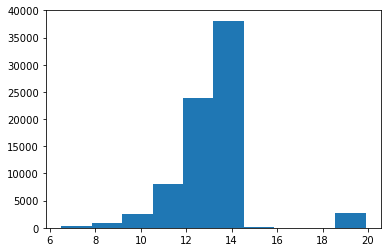

In [11]:
plt.hist(n33_DF.mag_IR2)

In [76]:
# np.save("../Data/NGC3324_NAN_2MASS+SPITZ_INP.npy", n33_DF.values.astype(float))

In [77]:

# n33_DF.drop(n33_DF[n33_DF['mag3_6']>99.].index,inplace=True)
# n33_DF.drop(n33_DF[n33_DF['mag4_5']>99.].index,inplace=True)
# n33_DF.drop(n33_DF[n33_DF['mag5_8']>99.].index,inplace=True)
# n33_DF.drop(n33_DF[n33_DF['mag8_0']>99.].index,inplace=True)

# n33_DF["mag24"] = [(-99)]*len(n33_DF[['mag3_6']].values)
# n33_DF["d24m"] = [(-99)]*len(n33_DF[['mag3_6']].values)
# n33_DF["alpha"] = alpha_IR(n33_DF["mag4_5"].values.astype(float),n33_DF["mag8_0"].values.astype(float))

# n33_DF.head()


In [78]:
# n33_DF.hist("alpha")

In [79]:
# n33_DF.info()

In [80]:
# np.save("../Data/NGC3324_INP.npy",n33_DF[["ra","dec","mag3_6",'d3_6m', 'mag4_5', 'd4_5m', 'mag5_8',\
#        'd5_8m', 'mag8_0', 'd8_0m','mag24', 'd24m',"alpha"]].values.astype(float))


In [20]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt

In [81]:

# image_file = "../../../ngc3324/FITS/JWST_f187n.fits"
# filename = get_pkg_data_filename(image_file)

# h = fits.getheader(image_file)

# f = fits.open(image_file)

# wcs = WCS(f[1].header)

In [82]:



# plt.style.use('dark_background')
# fig, ax = plt.subplots(figsize=(24,14),dpi=100)
# ax = plt.subplot(projection=wcs)

# plt.grid(color='white', ls='solid')
# plt.imshow(f[1].data,cmap='hot',vmin=0,vmax=100,origin='lower')
# ymax, ymin = ax.get_ylim()
# plt.colorbar()

# ras, decs = wcs.wcs_pix2world(np.linspace(-2000,17000,100), np.linspace(-100,9000,100), 1)

# n33_nan = n33_df[['ra', 'dec','mag_J','dJ_m','mag_H','dH_m','mag_Ks','dKs_m','mag3_6', 'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8','d5_8m', 'mag8_0', 'd8_0m']].values.astype(float)

# n33_nan = n33_nan[n33_nan[:,0]>min(ras)]
# n33_nan = n33_nan[n33_nan[:,0]<max(ras)]
# n33_nan = n33_nan[n33_nan[:,1]>min(decs)]
# n33_nan = n33_nan[n33_nan[:,1]<max(decs)]

# plt.scatter(n33_nan[:,0],n33_nan[:,1],transform=ax.get_transform('fk5'))

In [94]:
0.92*0.049*(1594*10**(-14.943/2.5))

7.573074416708612e-05

In [102]:
e_mag_to_Jy(0.049,14.943,1594)

7.581586200020797e-05

In [153]:
band_names = ['mag_J','dJ_m','mag_H','dH_m','mag_Ks','dKs_m','mag3_6', 'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8','d5_8m', 'mag8_0', 'd8_0m']

df_n33_nan = n33_df[np.concatenate((['ra','dec'],band_names))]
df_n33_nan.where(df_n33_nan[band_names]<98,inplace=True)
df_n33_nan.head()

,ra,dec,mag_J,dJ_m,mag_H,dH_m,mag_Ks,dKs_m,mag3_6,d3_6m,mag4_5,d4_5m,mag5_8,d5_8m,mag8_0,d8_0m
G286.0000-01.6076,157.553803,-59.753506,14.943,0.049,14.287,0.058,14.000,0.068,13.718,0.109,NaN,NaN,NaN,NaN,NaN,NaN
G286.0000-01.4378,157.726576,-59.607751,9.592,0.036,9.276,0.042,9.192,0.031,9.224,0.037,9.228,0.046,9.163,0.044,9.185,0.03
G286.0000-00.2122,158.929997,-58.549566,16.158,0.119,14.774,0.077,14.117,0.067,13.685,0.084,13.462,0.109,NaN,NaN,NaN,NaN
G286.0000-00.8792,158.284282,-59.126860,15.620,0.089,14.849,0.093,14.773,0.130,14.220,0.097,14.089,0.163,NaN,NaN,NaN,NaN
G286.0000-00.0972,159.039269,-58.449703,NaN,NaN,15.259,0.122,14.368,0.097,13.771,0.112,13.427,0.149,NaN,NaN,NaN,NaN


In [154]:

for i, F_0 in enumerate([1594, 1594, 1024, 1024, 666.7,666.7,277.500, 277.500, 179.500, 179.500, 116.600, 116.600, 63.100, 63.100]):
    if i%2==0:
        df_n33_nan[band_names[i]] = mag_to_Jy(m=n33_df[band_names[i]].values,F0=F_0) # Convert mags in a column to fluxes
    else:
        df_n33_nan[band_names[i]] = e_mag_to_Jy(e_m=n33_df[band_names[i]].values,m=n33_df[band_names[i-1]].values,F0=F_0) # Convert errors in a column to flux

ras, decs = wcs.wcs_pix2world(np.linspace(-2000,17000,100), np.linspace(-100,9000,100), 1)
df_n33_nan.where(np.floor(np.log10(df_n33_nan[band_names]))>-35,inplace=True)
print(df_n33_nan.head())
n33_nan = df_n33_nan.values.astype(float)
n33_nan = n33_nan[n33_nan[:,0]>min(ras)]
n33_nan = n33_nan[n33_nan[:,0]<max(ras)]
n33_nan = n33_nan[n33_nan[:,1]>min(decs)]
n33_nan = n33_nan[n33_nan[:,1]<max(decs)]

df_n33_nan = pd.DataFrame(data=n33_nan, columns=np.concatenate((['ra','dec'],band_names)))
# df_n33_nan.head()
df_n33_nan.to_csv('../../../ngc3324/Spitzer_CosmicCliffs.csv')

                           ra        dec     mag_J      dJ_m     mag_H  \
G286.0000-01.6076  157.553803 -59.753506  0.001680  0.000076  0.001975   
G286.0000-01.4378  157.726576 -59.607751  0.232107  0.007696  0.199480   
G286.0000-00.2122  158.929997 -58.549566  0.000549  0.000060  0.001261   
G286.0000-00.8792  158.284282 -59.126860  0.000901  0.000074  0.001177   
G286.0000-00.0972  159.039269 -58.449703       NaN       NaN  0.000807   

                       dH_m    mag_Ks     dKs_m    mag3_6     d3_6m    mag4_5  \
G286.0000-01.6076  0.000105  0.001675  0.000105  0.000904  0.000091       NaN   
G286.0000-01.4378  0.007717  0.140324  0.004007  0.056710  0.001933  0.036548   
G286.0000-00.2122  0.000089  0.001504  0.000093  0.000932  0.000072  0.000740   
G286.0000-00.8792  0.000101  0.000822  0.000098  0.000569  0.000051  0.000415   
G286.0000-00.0972  0.000091  0.001193  0.000107  0.000861  0.000089  0.000764   

                      d4_5m    mag5_8     d5_8m    mag8_0     d8_0m 

In [158]:
n33_DF = df_n33_nan
n33_DF.dropna(inplace=True)

n33_DF["mag24"] = [(-99)]*len(n33_DF[['mag3_6']].values)
n33_DF["d24m"] = [(-99)]*len(n33_DF[['mag3_6']].values)
n33_DF["alpha"] = alpha_IR(n33_DF["mag4_5"].values.astype(float),n33_DF["mag8_0"].values.astype(float))

n33_DF.head()

np.save("../Data/CosmicCliffs_INP.npy",n33_DF[["ra","dec","mag3_6",'d3_6m', 'mag4_5', 'd4_5m', 'mag5_8',\
       'd5_8m', 'mag8_0', 'd8_0m','mag24', 'd24m',"alpha"]].values.astype(float))

In [19]:
print(np.shape(n33_nan))


(826, 10)


In [20]:
n33_nonan = n33_DF.values.astype(float)


n33_nonan = n33_nonan[n33_nonan[:,0]>min(ras)]
n33_nonan = n33_nonan[n33_nonan[:,0]<max(ras)]
n33_nonan = n33_nonan[n33_nonan[:,1]>min(decs)]
n33_nonan = n33_nonan[n33_nonan[:,1]<max(decs)]

print(np.shape(n33_nonan))

(162, 13)
